In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import circlify
import pyvis

In [118]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/10_OneNumSevCatSubgroupsSevObs.csv'
df = pd.read_csv(url)
df['percent'] = df['tip']*100/(df['total_bill'])
df

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


# Boxplot

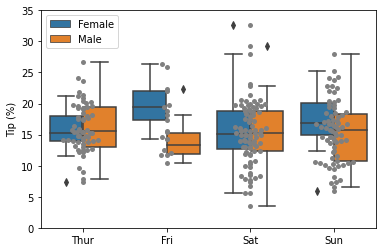

In [124]:
counts = df.groupby(["day", "sex"]).agg(n=("tip", "count"), median=("tip", "median"))

df["day"] = pd.Categorical(df["day"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
ax = sns.boxplot(x="day", y="percent", hue="sex", data=df, dodge=True)
ax.set_xlabel("")
ax.set_ylabel("Tip (%)")
ax.set_ylim(0,35)

for sex, subdata in df.groupby("sex"):
    sns.swarmplot(x=subdata['day'].cat.codes, y=subdata['percent'], data=df, color="grey")
    #ax.scatter(x=subdata['day'].cat.codes, y=subdata['percent'], color='gray', s=3, alpha=0.4, zorder=1)

# p = range(8)
# for i , row in counts.reset_index().iterrows():
#     #print(row)
#     ax.text(p[i]-0.1, 10, s = f"n: {row['n']}", color='black', ha="center")

plt.show()

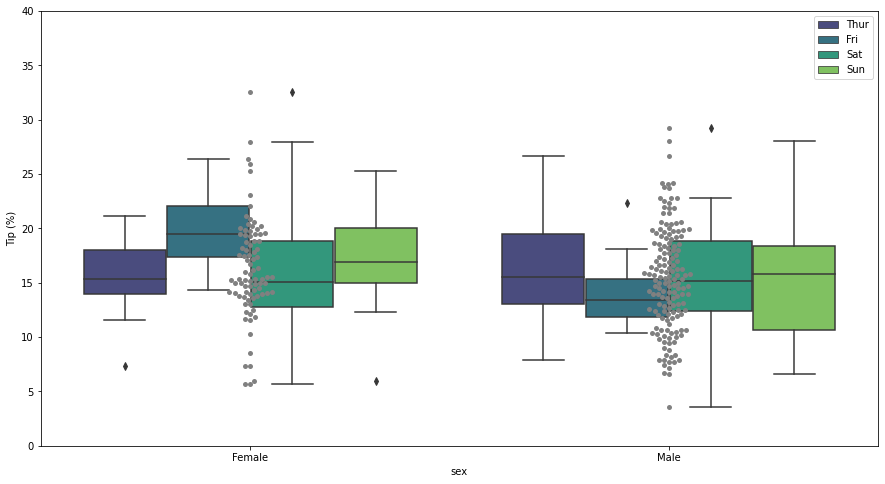

In [123]:
df["day"] = pd.Categorical(df["day"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="sex", y="percent", hue="day", data=df, dodge=True, palette="viridis")
ax.set_xlabel("")
ax.set_ylabel("Tip (%)")
ax.set_ylim(0,40)
ax = sns.swarmplot(x=df['sex'], y=df['percent'], data=df, color="grey")

plt.show()

# Violin Plot

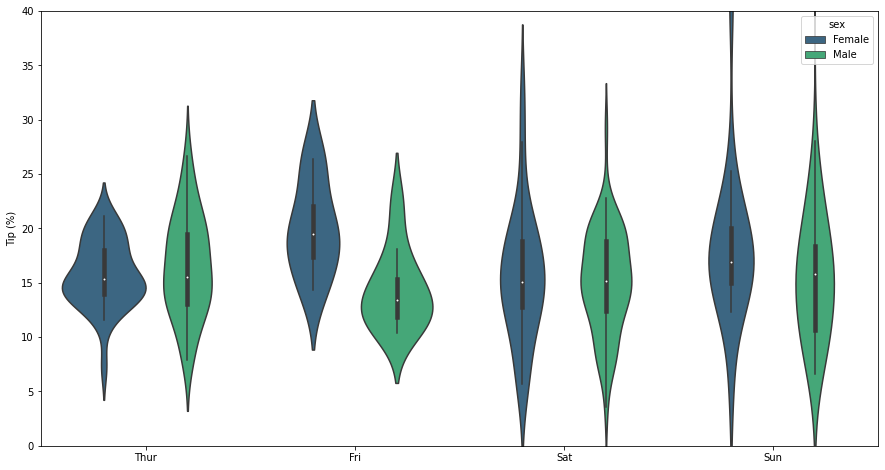

In [116]:
df["day"] = pd.Categorical(df["day"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
# df["tip"] = pd.Categorical(df["tip"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
# print(df)
plt.figure(figsize = (15,8))
sns.violinplot(x="day", y="percent", hue="sex", data=df, 
               palette="viridis", scale_hue=False)
plt.xlabel('')
plt.ylabel('Tip (%)')
plt.ylim(0, 40)
plt.show()

# Histogram

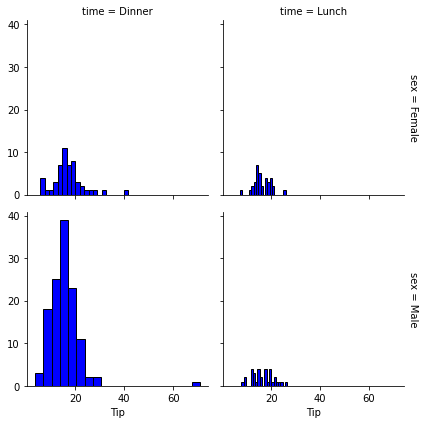

In [80]:
df["day"] = pd.Categorical(df["day"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
g = sns.FacetGrid(df, col="time", row="sex", margin_titles=True)
g.map(plt.hist, 'percent', bins=20, color="blue",  fill="#69b3a2",edgecolor = 'black')
g.set_axis_labels("Tip", "")
plt.show()